In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson





In [2]:
def Rosenbrock(x):
    y = 0
    for i in range(x.shape[0]-1):
        y+=((1-x[i])**2)+100*((x[i+1]-(x[i]**2))**2)
    return y

In [3]:
def heavy_ball(f,grad,x0,eps=10**(-4),N = 10000,alpha = 0.01,beta = 0.1):
    x_cur = np.asarray(x0)
    x_prev = np.asarray(x0)
    M = 0
    grads = []
    points = []
    for i in range(N):
        points.append(x_cur)
        grads.append(grad(x_cur))
        x_new = x_cur - alpha*grad(x_cur)+beta*(x_cur - x_prev)
        M+=1
            
        if np.linalg.norm(grad(x_new))<eps:   
            break
        x_prev = x_cur
        x_cur = x_new
    points.append(x_cur)
    return x_cur,M,grads, points




In [4]:
def grad_rosenbrock(x):
    y = np.zeros_like(x)
    y[0] = -2*(1-x[0]) - 400*(x[1] - x[0]**2)*x[0]
    for i in range(1, x.shape[0] - 1):
        y[i] = -2*(1-x[i])+200*(x[i]-x[i-1]**2)-400*(-x[i]**2+x[i+1])*x[i]
    y[-1] = 200*(x[-1]-x[-2]**2)
    return y

In [5]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 10000

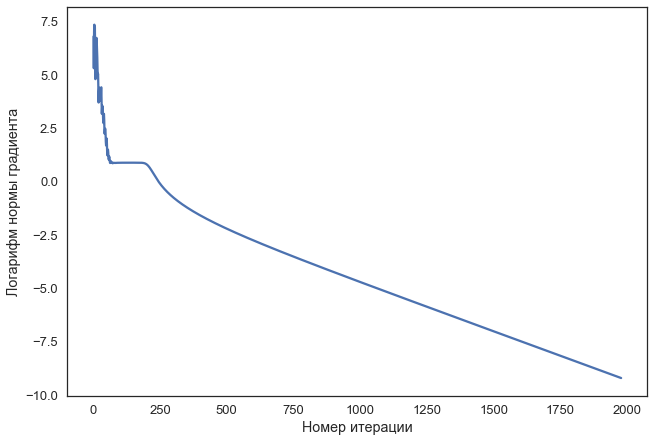

предельная точка: [0.99999967 0.99999933 0.99999867 0.99999732 0.99999464 0.99998925
 0.99997844 0.99995677 0.99991332 0.99982621]
количество итераций: 1978


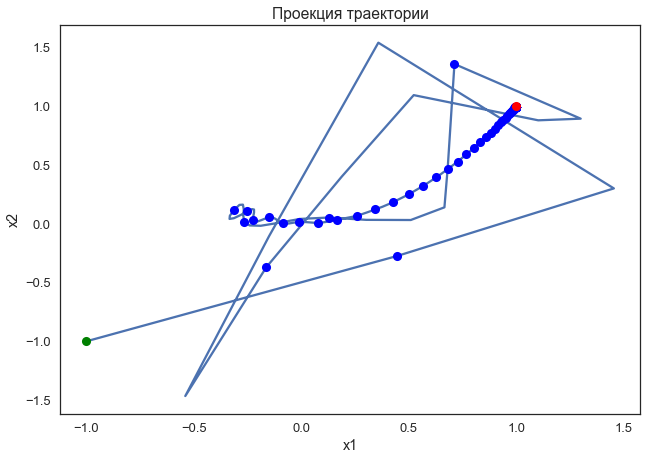

In [6]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(100):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()




In [7]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.8
N = 500
new_points = []
new_grads = []

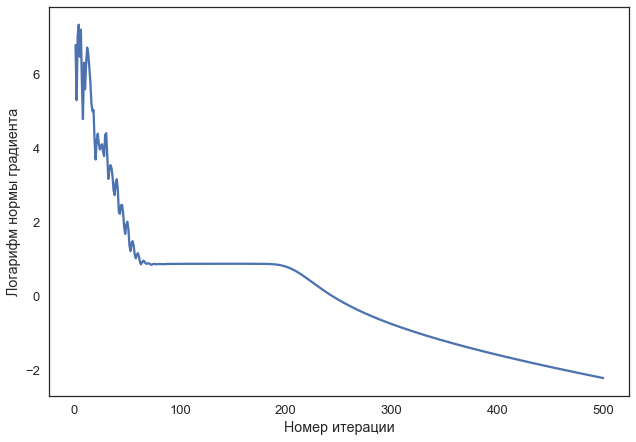

предельная точка: [0.99965028 0.99929946 0.99859635 0.99718822 0.99437126 0.9887478
 0.97756899 0.95553332 0.91282332 0.83278559]
количество итераций: 500


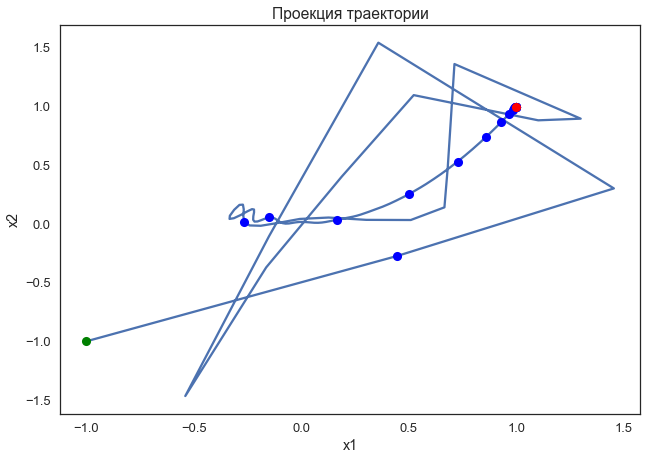

In [8]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0018,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [9]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

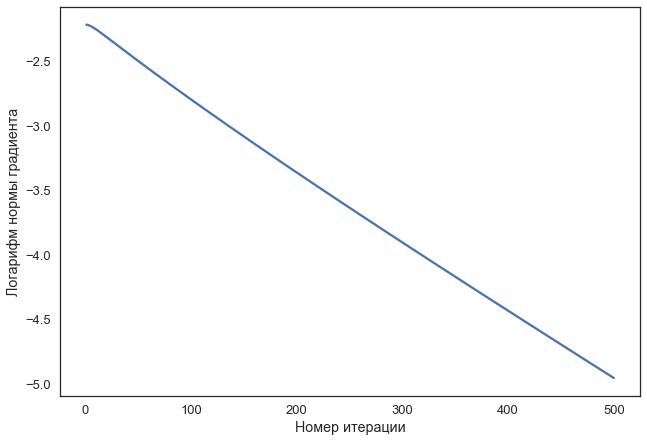

предельная точка: [0.99997668 0.99995328 0.99990635 0.99981224 0.99962359 0.99924545
 0.99848771 0.99697017 0.99393437 0.98787508]
количество итераций: 500


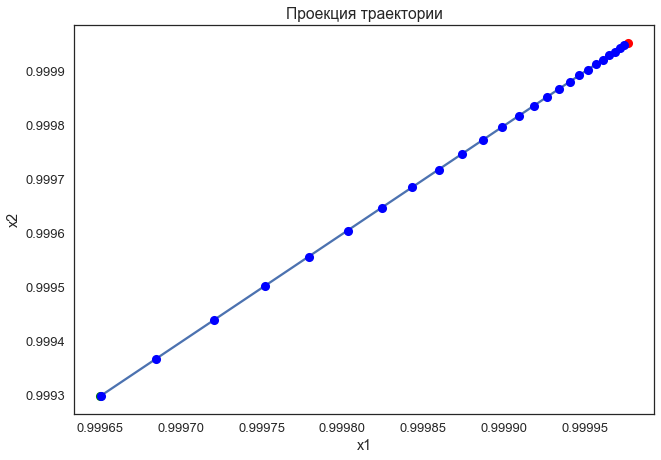

In [10]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [11]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

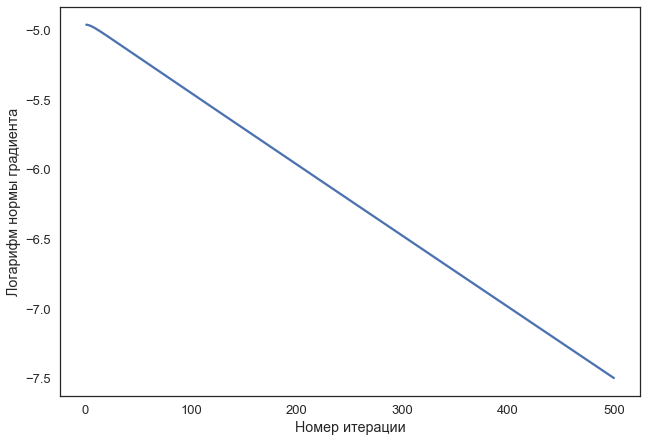

предельная точка: [0.99999817 0.99999633 0.99999264 0.99998524 0.99997041 0.99994067
 0.99988106 0.99976153 0.99952193 0.99904169]
количество итераций: 500


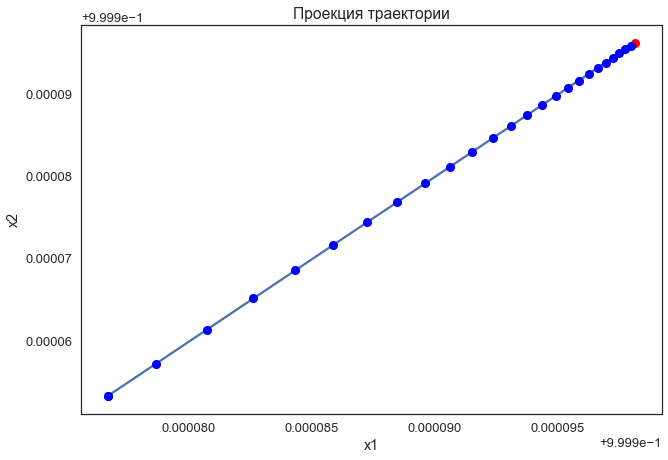

In [12]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(25):
    plt.plot(points[i*20+1,0], points[i*20+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [13]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.8
N = 500

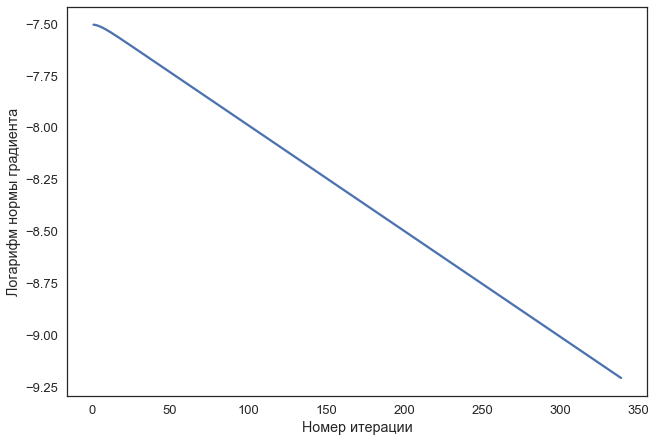

предельная точка: [0.99999967 0.99999933 0.99999866 0.99999732 0.99999462 0.99998922
 0.99997838 0.99995665 0.99991309 0.99982574]
количество итераций: 339


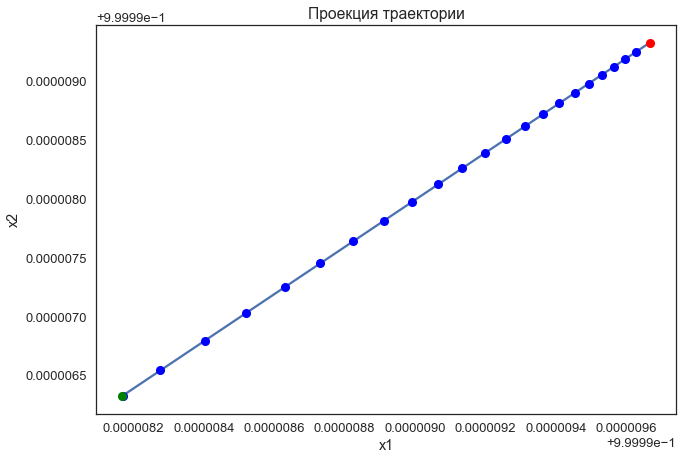

In [14]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.002,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(22):
    plt.plot(points[15*i+1,0], points[15*i+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [15]:
new_points.append(points)
new_grads.append(grads)

In [16]:
listed=[]
for i in new_points:
    for j in i:
        listed.append(j)
len(listed)
graded = []
for i in new_grads:
    for j in i:
        graded.append(j)
        

In [17]:
listed = np.array(listed)
new_grads = np.array(graded)

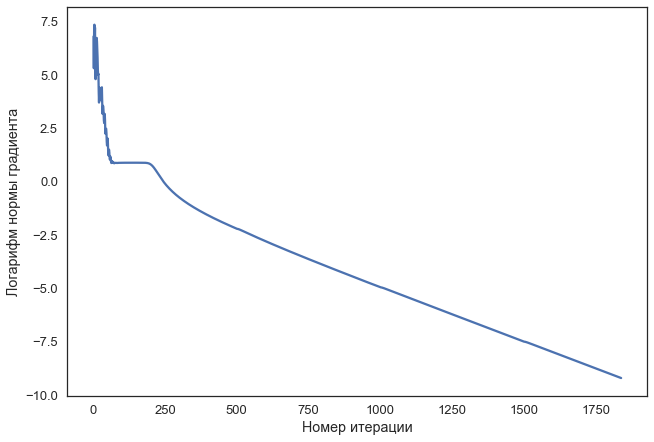

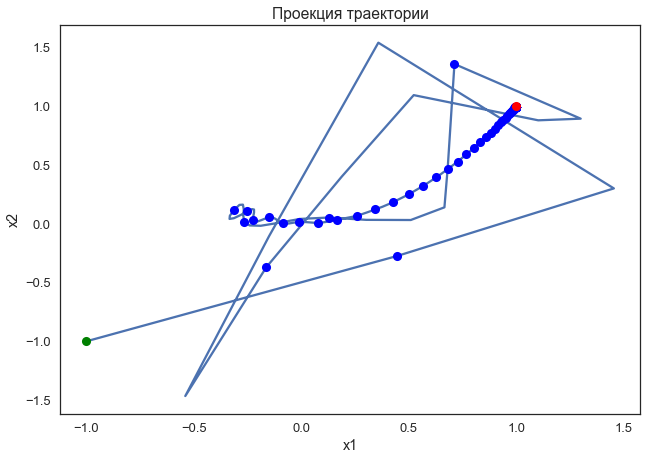

In [18]:
plt.plot(np.linspace(1, 1839, 1839), np.log(np.sqrt(np.sum(np.array(graded)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
plt.plot(listed[:,0], listed[:,1])
for i in range(100):
    plt.plot(listed[i*5+1,0], listed[i*5+1,1], 'bo')
plt.plot(listed[1839,0], listed[1839,1], 'ro')
plt.plot(listed[0,0], listed[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

### Как видно метод с подбором параметров после разбиения по 500 точек дал небольшое ускорение 
1839 вместо 1978 для бета = 0.8


Однако качественное изменение траектории и изменения градиентов достичь не удалось

## beta = 0.9

In [62]:
x0 = [-1,-1,1,1,1,1,1,1,1,1]
beta = 0.9
N = 10000

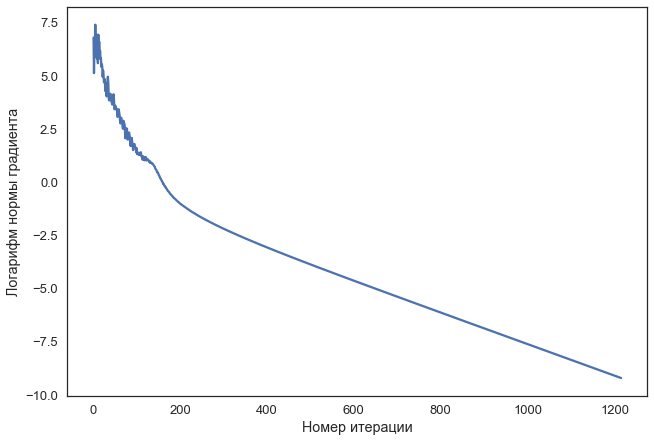

предельная точка: [0.99999967 0.99999933 0.99999866 0.99999732 0.99999462 0.99998921
 0.99997838 0.99995664 0.99991307 0.99982571]
количество итераций: 1215


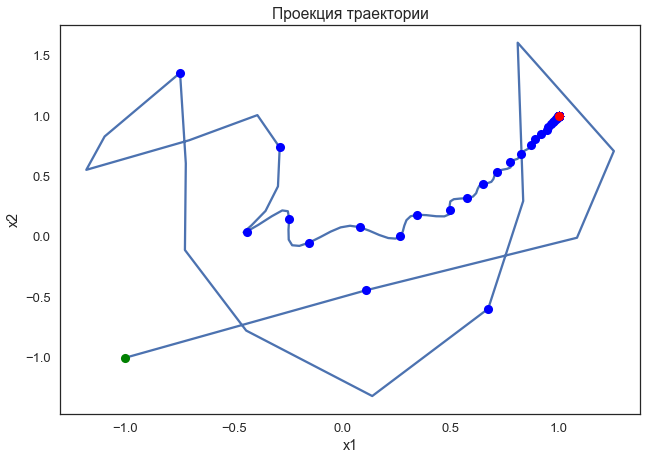

In [63]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00138,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
for i in range(100):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()



In [68]:
x0=[-1,-1,1,1,1,1,1,1,1,1]
beta = 0.9
N = 200
new_points = []
new_grads = []

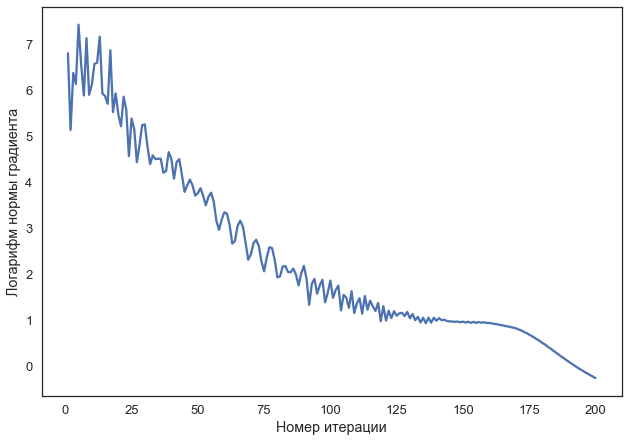

предельная точка: [0.99788435 0.99582652 0.99164721 0.98336396 0.96694641 0.93485132
 0.87373855 0.76293632 0.58099198 0.33466867]
количество итераций: 200


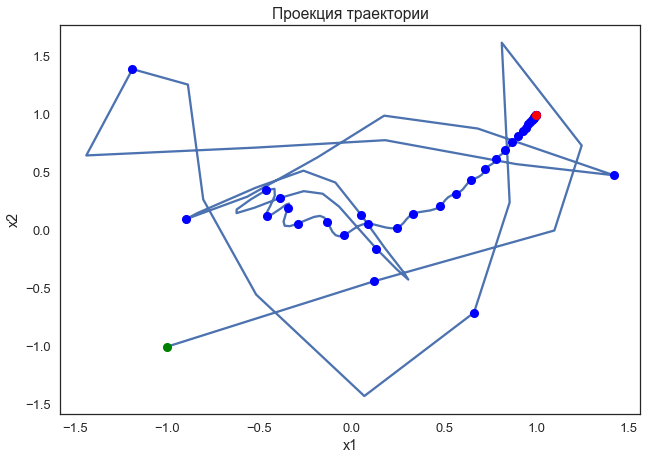

In [70]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.00139,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])

for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.plot(points[m-1,0], points[m-1,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [71]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

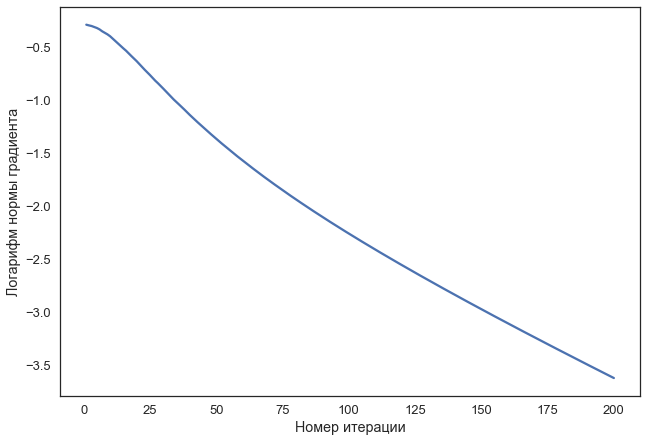

предельная точка: [0.99991319 0.99982607 0.99965137 0.99930116 0.99859936 0.99719378
 0.99438156 0.98876679 0.97760358 0.95559506]
количество итераций: 200


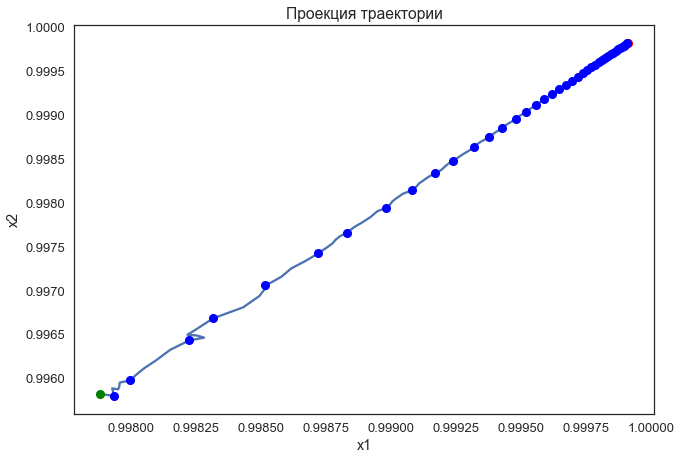

In [73]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [74]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

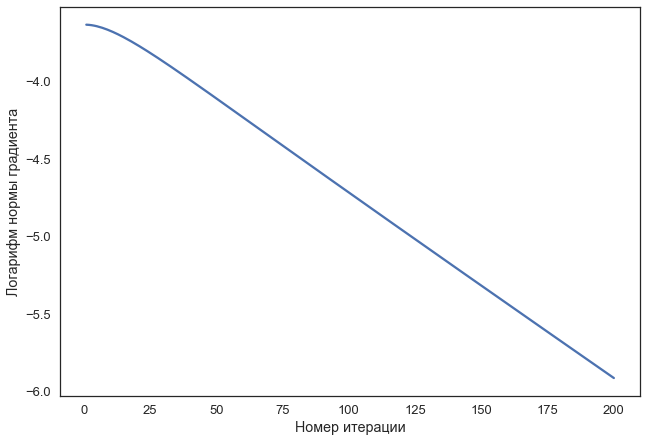

предельная точка: [0.99999112 0.9999822  0.99996432 0.99992847 0.9998566  0.9997125
 0.99942365 0.99884475 0.99768506 0.99536389]
количество итераций: 200


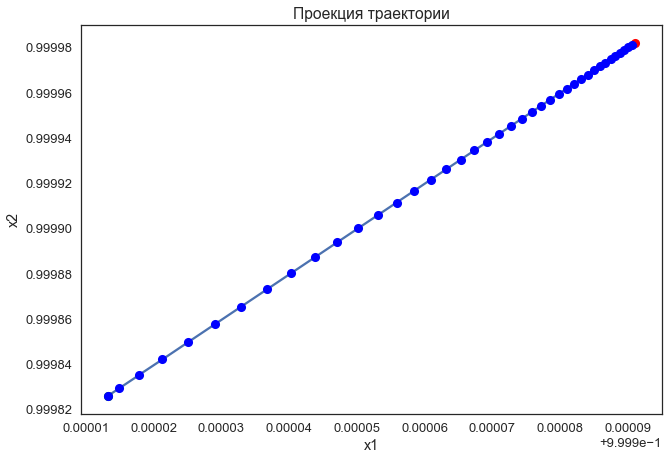

In [76]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [77]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

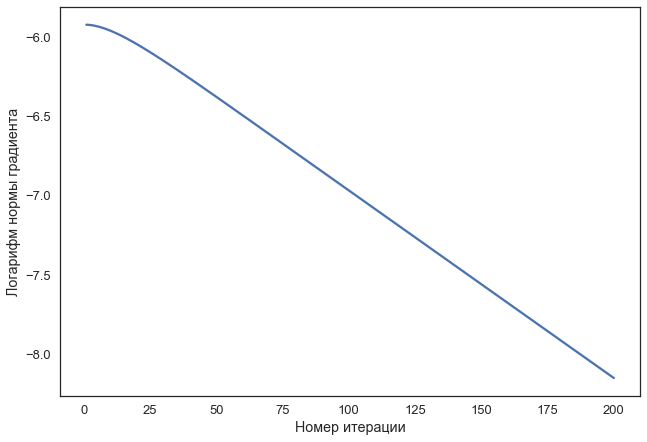

предельная точка: [0.99999905 0.9999981  0.99999618 0.99999235 0.99998466 0.99996924
 0.99993833 0.99987636 0.99975212 0.99950306]
количество итераций: 200


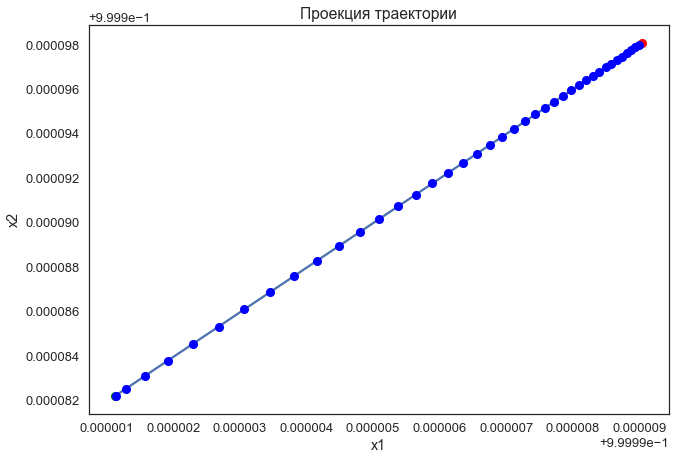

In [78]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(40):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [79]:
new_points.append(points)
new_grads.append(grads)
x0 = x
beta = 0.9
N = 200

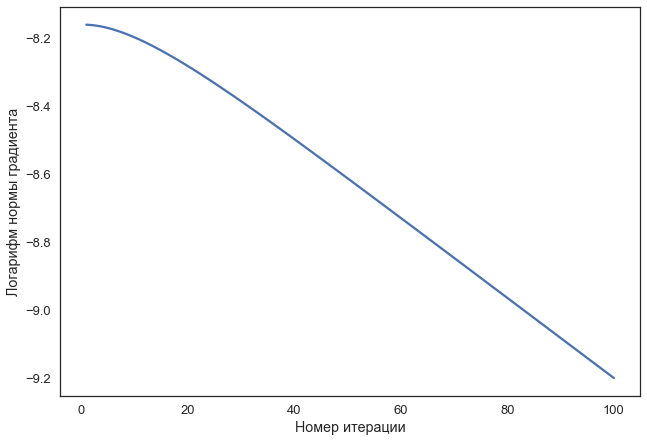

предельная точка: [0.99999966 0.99999933 0.99999865 0.99999729 0.99999457 0.99998912
 0.99997819 0.99995626 0.99991231 0.99982419]
количество итераций: 100


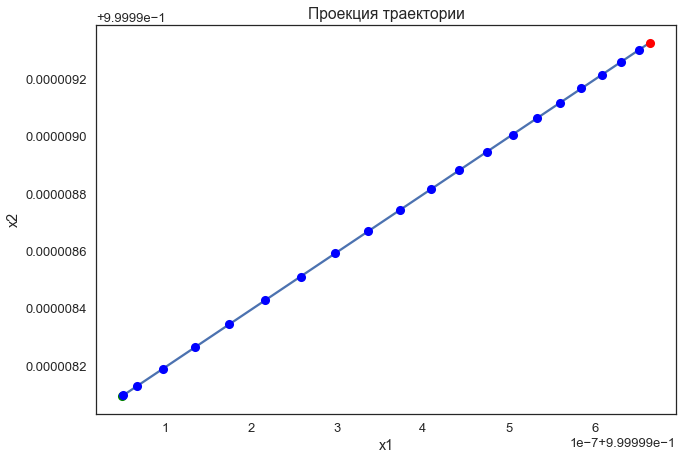

In [83]:
x, m, grads, points = heavy_ball(Rosenbrock,grad_rosenbrock,x0 = x0,alpha = 0.0021,beta = beta,N=N)
plt.plot(np.linspace(1, m, m), np.log(np.sqrt(np.sum(np.array(grads)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
points = np.array(points)
print('предельная точка:',x)
print('количество итераций:',m)


plt.plot(points[:,0], points[:,1])
plt.plot(points[m,0], points[m,1], 'ro')
plt.plot(points[0,0], points[0,1], 'go')
for i in range(20):
    plt.plot(points[i*5+1,0], points[i*5+1,1], 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

In [85]:
new_points.append(points)
new_grads.append(grads)

In [86]:
listed=[]
for i in new_points:
    for j in i:
        listed.append(j)
len(listed)
graded = []
for i in new_grads:
    for j in i:
        graded.append(j)

In [87]:
listed = np.array(listed)
new_grads = np.array(graded)

In [88]:
listed.shape

(905, 10)

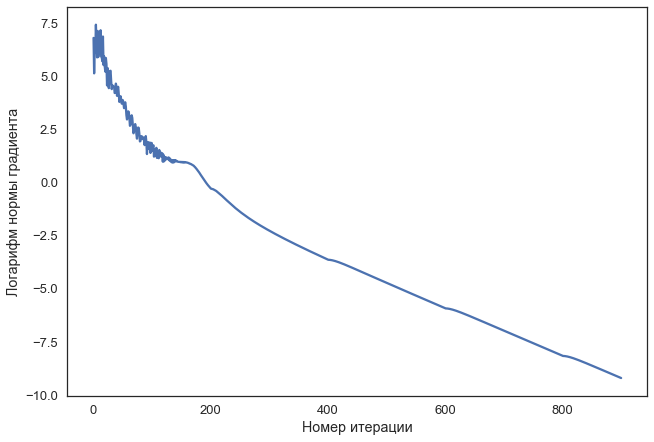

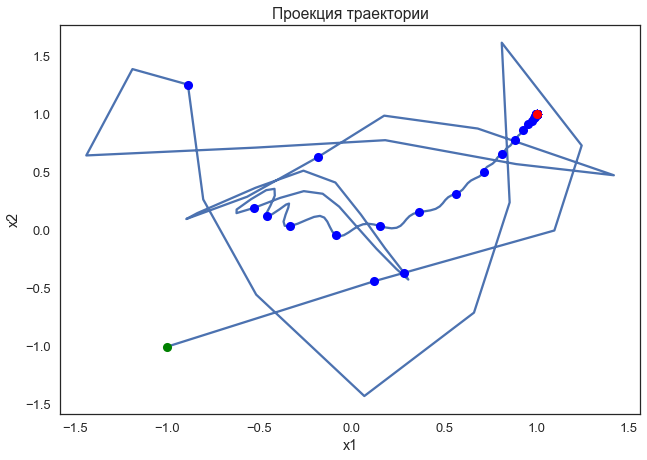

In [92]:
plt.plot(np.linspace(1, 900, 900), np.log(np.sqrt(np.sum(np.array(graded)**2, axis = 1))))
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм нормы градиента')
plt.show()
plt.plot(listed[:,0], listed[:,1])
for i in range(100):
    plt.plot(listed[i*9+1,0], listed[i*9+1,1], 'bo')
plt.plot(listed[900,0], listed[900,1], 'ro')
plt.plot(listed[0,0], listed[0,1], 'go')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Проекция траектории')
plt.show()

### Как видно метод с подбором параметров после разбиения по 200 точек дал более существенное  ускорение 
900 вместо 1215 для бета = 0.9

Как может быть видно, траектория стала более резкой, но общий рисунок остался тем же 

In [ ]:
##